# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('07-x_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('07-x_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('07-y_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('07-y_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **NORMALIZACION DE CARACTERISTICAS**

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [5]:
x_train_std

array([[-0.28473982, -0.68217408,  0.75237865, ...,  0.29571302,
         0.40370178,  0.45612453],
       [-0.82661548, -1.0809523 ,  0.49697135, ...,  0.1506162 ,
         0.2718297 , -1.3665272 ],
       [-0.83473385, -0.50536228,  0.4546447 , ..., -0.21915152,
         0.2060364 , -1.57410329],
       ...,
       [ 0.04985693,  0.32057162, -0.93841818, ...,  0.02574343,
        -0.27763778,  1.49861911],
       [-0.77723893,  0.66056347, -0.70421684, ..., -1.60011087,
        -1.4309097 , -0.32672636],
       [-0.31401814,  2.23177811, -2.69123725, ..., -1.94072982,
        -2.45139907, -0.35230741]])

# **MODELO DE MARCHINE LEARNING**

In [6]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11776     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [7]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/800
73/73 [==============================] - 1s 3ms/step - loss: 0.9727 - accuracy: 0.5841
Epoch 2/800
73/73 [==============================] - 0s 3ms/step - loss: 0.8494 - accuracy: 0.6416
Epoch 3/800
73/73 [==============================] - 0s 3ms/step - loss: 0.8004 - accuracy: 0.6671
Epoch 4/800
73/73 [==============================] - 0s 3ms/step - loss: 0.7802 - accuracy: 0.6814
Epoch 5/800
73/73 [==============================] - 0s 3ms/step - loss: 0.7504 - accuracy: 0.6870
Epoch 6/800
73/73 [==============================] - 0s 3ms/step - loss: 0.7502 - accuracy: 0.6896
Epoch 7/800
73/73 [==============================] - 0s 3ms/step - loss: 0.7141 - accuracy: 0.7077
Epoch 8/800
73/73 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.7164
Epoch 9/800
73/73 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.7030
Epoch 10/800
73/73 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.7173
Epoch 11/

array([2, 3, 0, 2, 3, 1, 2, 0, 0, 0, 2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 3, 2,
       2, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 3,
       2, 3, 3, 2, 0, 2, 1, 0, 2, 3, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0,
       2, 3, 0, 2, 3, 0, 3, 2, 1, 0, 0, 2, 2, 2, 2, 2, 3, 3, 2, 1, 0, 2,
       2, 2, 3, 2, 0, 0, 3, 0, 2, 0, 2, 2, 3, 2, 0, 2, 1, 2, 2, 2, 1, 3,
       1, 3, 1, 2, 2, 3, 0, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3,
       0, 2, 2, 3, 3, 1, 1, 0, 1, 2, 3, 3, 2, 0, 1, 0, 2, 2, 3, 0, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 3, 2, 1, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 1,
       0, 0, 3, 0, 3, 0, 2, 0, 3, 3, 1, 3, 2, 0, 3, 3, 2, 2, 3, 2, 1, 2,
       3, 1, 2, 2, 0, 1, 0, 3, 3, 2, 2, 0, 3, 2, 3, 1, 1, 3, 2, 3, 2, 2,
       1, 2, 0, 2, 2, 3, 3, 3, 2, 1, 0, 2, 3, 2, 2, 0, 0, 1, 3, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 1, 3, 2, 3, 3, 2, 2, 2,
       3, 2, 1, 2, 3, 3, 0, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 3,
       1, 1, 3, 1, 2, 2, 0, 2, 2, 2, 3, 2, 0, 3, 2,

# **EVALUACION**

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        83
           1       0.60      0.51      0.55        96
           2       0.75      0.75      0.75       241
           3       0.74      0.75      0.75       159

    accuracy                           0.71       579
   macro avg       0.69      0.70      0.69       579
weighted avg       0.71      0.71      0.71       579



In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        83
           1       0.60      0.51      0.55        96
           2       0.75      0.75      0.75       241
           3       0.74      0.75      0.75       159

    accuracy                           0.71       579
   macro avg       0.69      0.70      0.69       579
weighted avg       0.71      0.71      0.71       579

Matriz de confusión, sin normalización
[[ 65   5  11   2]
 [ 17  49  22   8]
 [ 10  20 180  31]
 [  4   8  28 119]]


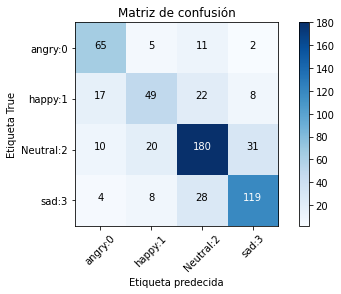

In [10]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')